In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Save path to CSV file as variable
data_file = Path("Resources/us_births_2016_2021.csv")

In [3]:
# Read CSV file using Pandas
us_births_df = pd.read_csv(data_file)
us_births_df

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [4]:
us_births_df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [5]:
#round age
us_births_df['Average Age of Mother (years)'] = us_births_df['Average Age of Mother (years)'].astype(float).astype(int)
us_births_df

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33,3262.0


In [6]:
#group columns of interest
mothers_age = us_births_df.groupby("Average Age of Mother (years)").agg({'Average Birth Weight (g)':"mean"}).sort_values(by='Average Age of Mother (years)').round()
mothers_age

,Average Birth Weight (g)
Average Age of Mother (years),
23,3122.0
24,3146.0
25,3171.0
26,3208.0
27,3217.0
28,3217.0
29,3237.0
30,3285.0
31,3308.0


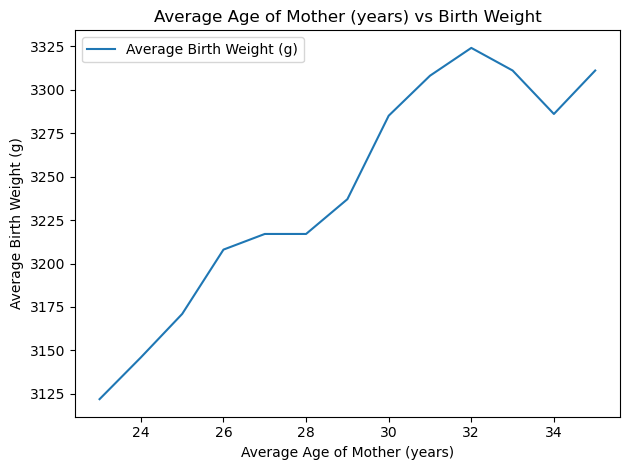

In [7]:
#line chart
age_line = mothers_age.plot(kind='line')
plt.xlabel('Average Age of Mother (years)')
plt.ylabel('Average Birth Weight (g)')
plt.title('Average Age of Mother (years) vs Birth Weight')
plt.tight_layout()

plt.savefig("Images/age_line.png")
plt.show()
          

Analysis: 
After analyzing our recent observations between the Average Age of Mothers and the Average weight of their babies,
A line graph was created based on this data. In this graph, there is a pretty visible trend that occurs when we compare these 2 sets of data.
As the Average Age of Mother increases the Average Birth Weight of their children also increases. There is a positive trend relationship that could be idenitified by looking at how each set of data affect each other